In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import dash
from dash import html, dcc, Input, Output
import threading

In [2]:
df_covid = pd.read_csv('C:\\Users\\m.owczarek\\Downloads\\02_Pliki do projektów końcowych.pl\\project_1_python.csv')
df_covid

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180472,190608,ZWE,Africa,Zimbabwe,2022-06-14,254155.0,0.0,5521.0,0.0,NaN,...,6270096.0,4563366.0,1026048.0,NaN,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180473,190609,ZWE,Africa,Zimbabwe,2022-06-15,254387.0,232.0,5525.0,4.0,NaN,...,6271703.0,4567466.0,1027822.0,7481.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180474,190610,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,5526.0,1.0,NaN,...,6274305.0,4570349.0,1029463.0,7126.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180475,190611,ZWE,Africa,Zimbabwe,2022-06-17,254753.0,251.0,5533.0,7.0,NaN,...,6276402.0,4574222.0,1031790.0,8297.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [4]:
df_population = df_covid[['location', 'population']].drop_duplicates()
df_population = df_population.sort_values(by='population', ascending= False).head(15)
df_population

,location,population
33499,China,1.444216e+09
74570,India,1.393409e+09
170959,United States,3.329151e+08
75441,Indonesia,2.763618e+08
122998,Pakistan,2.251999e+08
21805,Brazil,2.139934e+08
118134,Nigeria,2.114007e+08
12663,Bangladesh,1.663035e+08
133450,Russia,1.459120e+08
103850,Mexico,1.302622e+08


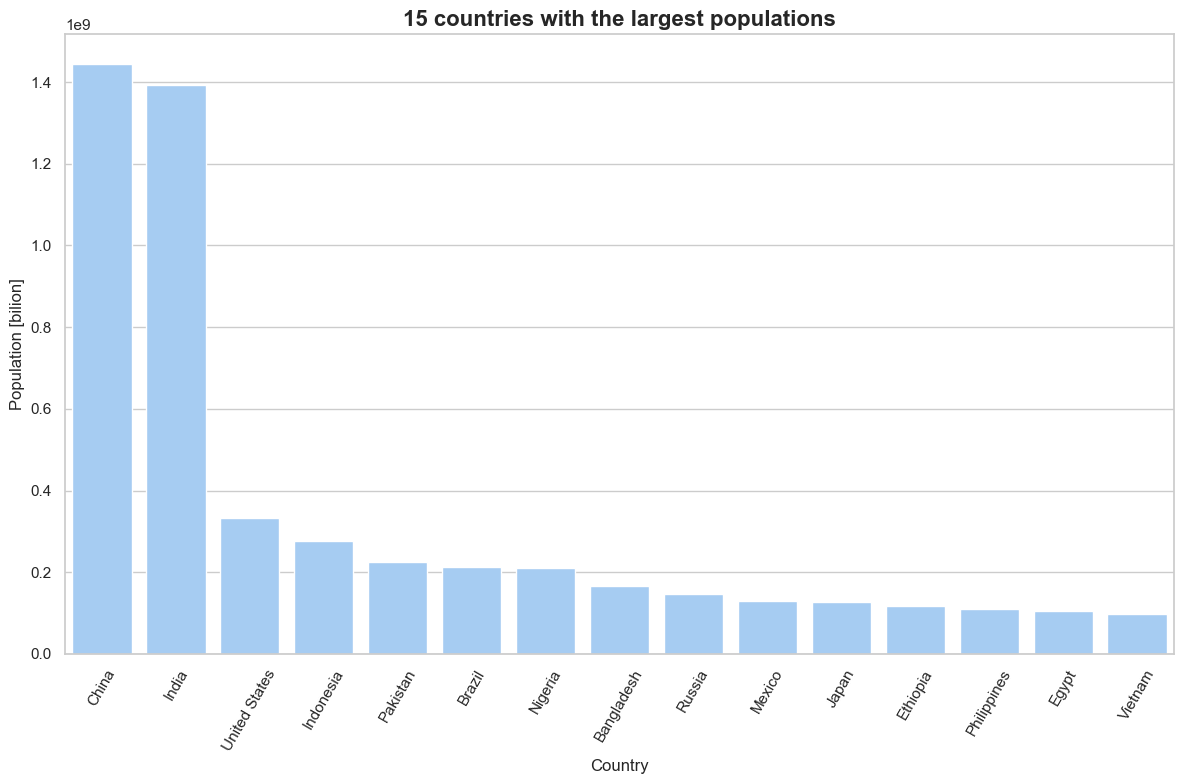

In [5]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
population_chart = sns.barplot(x='location', 
                               y='population', 
                               data=df_population,
                               color='#99CCFF')
population_chart.set_xticklabels(population_chart.get_xticklabels(), rotation=60)
plt.title('15 countries with the largest populations', fontsize=16, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Population [bilion]')
plt.tight_layout()
plt.show()

In [6]:
df_population_lifeexp = df_covid[['location', 'continent', 'population', 'life_expectancy']].drop_duplicates()


In [7]:
pop_lifeexp_fig = px.scatter(data_frame=df_population_lifeexp, 
                               x='population', 
                               y='life_expectancy',
                               color='continent',
                               color_discrete_sequence=px.colors.qualitative.Set2,
                               title='Life expectancy vs. population by continent',
                               log_x=True)

pop_lifeexp_fig.update_layout(
    title={
        'text': 'Life expectancy vs. population by continent',
        'y': 0.95, 
        'x': 0.5, 
        'xanchor': 'center',  
        'yanchor': 'top',  
    },
    xaxis_title='Population', 
    yaxis_title='Life Expectancy'
)

pop_lifeexp_fig


In [8]:
df_new_cases = df_covid[['location', 'date', 'new_cases']]
countries = ['Kenya', 'Poland']
df_new_cases = df_new_cases[df_new_cases['location'].isin(countries)]
df_new_cases

,location,date,new_cases
85190,Kenya,2020-03-06,NaN
85191,Kenya,2020-03-07,NaN
85192,Kenya,2020-03-08,NaN
85193,Kenya,2020-03-09,NaN
85194,Kenya,2020-03-10,NaN
...,...,...,...
130090,Poland,2022-06-14,321.0
130091,Poland,2022-06-15,232.0
130092,Poland,2022-06-16,228.0
130093,Poland,2022-06-17,48.0


In [9]:
new_cases_fig = px.line(df_new_cases,
                        x='date',
                        y='new_cases',
                        color = 'location',
                        color_discrete_sequence=px.colors.qualitative.Set2,
                        title='COVID-19 - new cases - comparison of Kenya and Poland'
)
new_cases_fig.update_layout(
    title={
        'text': 'COVID-19 - new cases - comparison of Kenya and Poland',
        'y': 0.95, 
        'x': 0.5, 
        'xanchor': 'center',  
        'yanchor': 'top',  
    },
    xaxis_title='Date', 
    yaxis_title='New cases'
)
new_cases_fig

In [10]:
df_dash_1 = df_covid

In [11]:
countries_list = list(df_dash_1['location'].drop_duplicates())

In [12]:
first_dash_app = dash.Dash()

first_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),                           
    html.P("Choose country:"),
    dcc.Dropdown(
        id='country', 
        options=[{'value': str(country), 'label': country} 
                 for country in countries_list],
        value=countries_list[0]
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
    ])

])

In [13]:
@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cummulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig

In [14]:
@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cummulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig

In [15]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()

In [16]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),                           
    html.P("Choose top x countries:"),
    dcc.Slider(5,20,5,
               value =5,
        id='slider', 
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-3", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-4", style={'display': 'inline-block', 'width': '48%'})
    ])

])

In [17]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),                           
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='my-slider'
    ),   
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='first-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='second-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])


In [18]:
@second_dash_app.callback(
    Output(component_id='first-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig


In [19]:
@second_dash_app.callback(
    Output(component_id='second-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date]
    df['vaccination_ratio'] = df['total_vaccinations'] / df['population']
    df = df.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig


In [20]:
thread = threading.Thread(target=second_dash_app.run_server)
thread.start()

C:\Users\m.owczarek\AppData\Local\Temp\ipykernel_21976\291756850.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\m.owczarek\AppData\Local\Temp\ipykernel_21976\291756850.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

